In [85]:
from qutip import *
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
sta_1 = Qobj([[1],[0],[0],[0]])
sta_2 = Qobj([[0],[1],[0],[0]])
sta_3 = Qobj([[0],[0],[1],[0]])
sta_4 = Qobj([[0],[0],[0],[1]])

In [87]:
s_1 = Qobj([[1],[0]])
s_2 = Qobj([[0],[1]])

In [88]:
N = 1/np.sqrt(8)
N1 = 1/np.sqrt(2)
N2 = 1/2
z = complex(0,0*np.pi)
z

0j

In [89]:
phase = np.exp(z)
phase

(1+0j)

In [90]:
#after applying the phase gate

st_1 =N*phase *tensor(s_1,sta_1)
st_2 =N*phase *tensor(s_2,sta_1)
st_3 =N* tensor(s_1,sta_2)
st_4 =N* tensor(s_2,sta_2)
st_5 =N* tensor(s_1,sta_3)
st_6 =N* tensor(s_2,sta_3)
st_7 =N* tensor(s_1,sta_4)
st_8 =N* tensor(s_2,sta_4)
R_1 = N1 *(s_1 + s_2)
R_1

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

In [91]:
#no more phase gate, the original grover's states construction

# st_1 =N* tensor(s_1,sta_1)
# st_2 =N* tensor(s_2,sta_1)
# st_3 =N* tensor(s_1,sta_2)
# st_4 =N* tensor(s_2,sta_2)
# st_5 =N* tensor(s_1,sta_3)
# st_6 =N* tensor(s_2,sta_3)
# st_7 =N* tensor(s_1,sta_4)
# st_8 =N* tensor(s_2,sta_4)
# R_1 = N1 *(s_1 + s_2)
# R_1

In [92]:
s = N2*(sta_1+sta_2+sta_3+sta_4)
s

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.5]
 [0.5]
 [0.5]
 [0.5]]

In [93]:
#s_t = tensor(R_1,s)
s_t = st_1+st_2+st_3+st_4+st_5+st_6+st_7+st_8
s_t

Quantum object: dims = [[2, 4], [1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]]

In [94]:
#searching 00 in R2

U_w = Qobj([[-1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
U_w

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[-1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]

In [95]:
I_2 = Qobj([[1,0],[0,1]])
U_w = tensor(I_2, U_w)
U_w

Quantum object: dims = [[2, 4], [2, 4]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[-1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]

In [96]:
def outer_product(s1,s2,num):
    #the input state should be ket
    dim1 = s1.shape[0]
    dim2 = s2.shape[0]
    if dim1 == dim2:
        sm = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
        #sm = [[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0]]
        for i in range(dim1):
            for j in range(dim2):
                sm[i][j] = 2*num*num
                if i == j:
                    sm[i][j] = sm[i][j]-1
        return(sm)
    else:
        return("dim error")
        

In [97]:
sm = outer_product(s,s,0.5)
# U_s = Qobj([[0,1,0,0,0,0,0,0],[1,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,0,0,1,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,0,0,1],[0,0,0,0,0,0,1,0]])
# sm = [[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0]]
# s[1]
U_s= Qobj(sm)
U_s

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[-0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5  0.5]
 [ 0.5  0.5 -0.5  0.5]
 [ 0.5  0.5  0.5 -0.5]]

In [98]:
U_s = tensor(I_2, U_s)
U_s

Quantum object: dims = [[2, 4], [2, 4]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[-0.5  0.5  0.5  0.5  0.   0.   0.   0. ]
 [ 0.5 -0.5  0.5  0.5  0.   0.   0.   0. ]
 [ 0.5  0.5 -0.5  0.5  0.   0.   0.   0. ]
 [ 0.5  0.5  0.5 -0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -0.5  0.5  0.5  0.5]
 [ 0.   0.   0.   0.   0.5 -0.5  0.5  0.5]
 [ 0.   0.   0.   0.   0.5  0.5 -0.5  0.5]
 [ 0.   0.   0.   0.   0.5  0.5  0.5 -0.5]]

In [99]:
sw = U_w * s_t
sw

Quantum object: dims = [[2, 4], [1, 1]], shape = (8, 1), type = ket
Qobj data =
[[-0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [-0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]]

In [100]:
ss = U_s * sw
ss

Quantum object: dims = [[2, 4], [1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]]

In [101]:
a1 = ss[0][0][0]
a2 = ss[1][0][0]
a3 = ss[2][0][0]
a4 = ss[3][0][0]
a5 = ss[4][0][0]
a6 = ss[5][0][0]
a7 = ss[6][0][0]
a8 = ss[7][0][0]

In [102]:
a1c = np.conj(a1)
a2c = np.conj(a2)
a3c = np.conj(a3)
a4c = np.conj(a4)
a5c = np.conj(a5)
a6c = np.conj(a6)
a7c = np.conj(a7)
a8c = np.conj(a8)

In [103]:
p1 = a1 * a1c
p2 = a2 * a2c
p3 = a3 * a3c
p4 = a4 * a4c
p5 = a5 * a5c
p6 = a6 * a6c
p7 = a7 * a7c
p8 = a8 * a8c

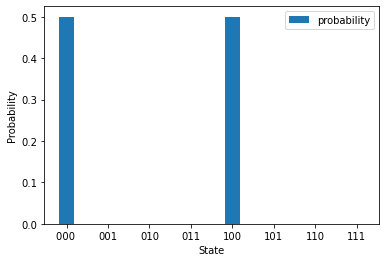

In [104]:
labels = ['000 ', '001','010','011','100','101','110','111' ]
width=0.35
prob = [p1,p2,p3,p4,p5,p6,p7,p8]

fig, ax=plt.subplots()

ax.bar(labels,prob,width,label='probability')
ax.set_ylabel('Probability')
ax.set_xlabel('State')
ax.legend()

plt.show()